# Análisis de Descriptores WHIM


---
<div style='background-color: #F9E5AB; padding: 1px 2px 5px 10px; font-size: 1em;'><h1 class='text-danger'>WHIM Descriptors
<small class="text-muted">Weighted Holistic Invariant Molecular descriptors</small>
</h1>
    </div>

1. Los descriptores WHIM son **descriptores geométricos (3D)**.
- Se construyen de tal forma que capturan información tridimencional relacionada con el tamaño molecular, la forma, la simetría y la distribución atómica.  
- La molécula es representada como una **configuración de puntos** (los átomos) en un espacio tridimencional definido por los ejes $x, y, z$.
- En términos generales su cálculo consiste en **centrar las coordenadas de los átomos** de la molécula, **calcular la matriz de covarianzas** de las coordenadas ($S_{qq'}$) y calcular los **eigenvalores** de dicha matriz:

$$S_{qq'} = \frac{\sum_{i=1}^{A}w_i (q_i - \overline{q}) (q'_i - \overline{q}')}{\sum_{i=1}^{A}w_i},$$

> donde $q_i$ y $q'_i$ son coordenadas atómicas ($x, y, z$) del átomo $i$, $\overline{q}$ y $\overline{q}'$ son las medias de las coordenadas, $A$ es el número de átomos, $w_i$ es un 'peso' o porpiedad según el tipo de átomo.
- Cada eigenvalor ($\lambda_1, \lambda_2, \lambda_3$) de la matriz de covarianzas representa una medida de dispersión de los átomos proyectados en cada uno de los 3 ejes principales. Esta dispersión y distribución atómica en los ejes principales es depués evaluada en cada uno de los descriptores.

- **Se dividen en dos clases principales:**
    - Descriptores Axiales o Direccionales
    - Descriptores Globales
- Los descriptores direccionales son calculados a apartir de los eigenvalores de la matriz de covarianzas.
- Los descriptores globales son una combinación de los direccionales.

> Los descriptores:
- **Axiales o Direccionales:**
    - $L_k$ : Dimensión axial ($k$ = 1, 2, 3)
    - $P_k$ : Forma axial ($k$ = 1, 2); `rdkit` omite el $k$ = 3
    - $G_k$ : Simetria axial ($k$ = 1, 2, 3)
    - $E_k$ : Densidad axial ($k$ = 1, 2, 3)  
<br>
- **Globales:**
    - $T$ : Dimensión Global
    - $A$ : Dimensión Global
    - $G$ : Simetría Global
    - $K$ : Forma Global
    - $D$ : Densidad Global
    - $V$ : Dimensión Global
    
- **Los descriptores son invariantes a la traslación y a la rotación de la molécula**. Invariante a la traslación porque las coordenadas de los átomos son centralizadas, e invariantes a la rotación, por la eigendescomposición de la matirz de covarianzas y la proyección en los eigenvectores resultantes.

Las propiedades atómicas, o pesos, **_w_** son las siguientes (todos son siempre positivos y son escalados con respecto a un átomo de Carbono):
> - **_u_** : _unweighted_
- **_m_** : _Atomic mass_
- **_v_** : _van der Waals Volume_
- **_e_** : _Sanderson Electronegativity_
- **_p_** : _Atomic polarizability_
- **_s_** : _Electropological satate indices of Kier and Hall_
- **_i_** : _Topologycal I-state_

La lista de descriptores que clacula *rdkit* es la siguiente (Refs: [1](https://github.com/rdkit/rdkit/blob/master/Code/GraphMol/Descriptors/test_data/whim.out.txt), [2](http://www.scbdd.com/chemdes/list19/), [3](http://www.vcclab.org/lab/indexhlp/whimdes.html)):

In [15]:
whim_axial = [ "L1u", "L2u", "L3u", "P1u", "P2u", "G1u", "G2u", "G3u", "E1u", "E2u", "E3u", 
               "L1m", "L2m", "L3m", "P1m", "P2m", "G1m", "G2m", "G3m", "E1m", "E2m", "E3m", 
               "L1v", "L2v", "L3v", "P1v", "P2v", "G1v", "G2v", "G3v", "E1v", "E2v", "E3v", 
               "L1e", "L2e", "L3e", "P1e", "P2e", "G1e", "G2e", "G3e", "E1e", "E2e", "E3e", 
               "L1p", "L2p", "L3p", "P1p", "P2p", "G1p", "G2p", "G3p", "E1p", "E2p", "E3p", 
               "L1i", "L2i", "L3i", "P1i", "P2i", "G1i", "G2i", "G3i", "E1i", "E2i", "E3i", 
               "L1s", "L2s", "L3s", "P1s", "P2s", "G1s", "G2s", "G3s", "E1s", "E2s", "E3s"]
whim_global = ["Tu", "Tm", "Tv", "Te", "Tp", "Ti", "Ts", 
               "Au", "Am", "Av", "Ae", "Ap", "Ai", "As", 
               "Gu", "Gm", 
               "Ku", "Km", "Kv", "Ke", "Kp", "Ki", "Ks", 
               "Du", "Dm", "Dv", "De", "Dp", "Di", "Ds", 
               "Vu", "Vm", "Vv", "Ve", "Vp", "Vi", "Vs"]

### Cálculo de los descriptores WHIM con RDKit

Creamos una **matriz donde cada fila corresponde a una molécula y las 114 características corresponden a las 114 propiedades** que calcula *rdkit*, las cuales son las mismas que calcula el software *Dragon*.

#### Cargamos el archivo con las moléculas
El siguiente archivo corresponde a un objeto de python (archivo binario) previamente creado, el cual contine los datos de las moléculas cocristalizadas con la proteína CDK2.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pickle, glob, os

In [8]:
path_to_file_str = F'../data/rdkit_molecules/cdk2_*_cocristalized_ligands.pyobj'.split('/')
path_to_file = glob.glob(os.path.join(*path_to_file_str))[0]
# Carga del archivo
with open(path_to_file, 'rb') as f:
    df_crys_poses_rdk = pickle.load(f)

#### Creamos el DataFrame con las 365 moléculas y los 114 desciptores

Como primer paso creamos una matriz de $n$ filas por $m$ columnas, donde $n$ = num. de moléculas y $m$ = num. de descriptores.

In [11]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors

In [12]:
n_descriptors = 114
n_moleculas = len(df_crys_poses_rdk.index)
whim_array = np.empty((n_moleculas, n_descriptors))

for i, mol in enumerate(df_crys_poses_rdk.mol_rdk):
    whim_mol = Chem.rdMolDescriptors.CalcWHIM(mol)
    whim_array[i] = whim_mol

Ahora creamos el dataframe con un multiindex que corresponda al pdb_id y al nombre de la molécula.

In [16]:
index_values = [df_crys_poses_rdk.index, df_crys_poses_rdk.Lig]
tuples = list(zip(*index_values))
# Creamos el multiíndice
m_index = pd.MultiIndex.from_tuples(tuples, names = ['pdb_id', 'lig_name'])

In [17]:
df_whim = pd.DataFrame(whim_array, index = m_index)
df_whim.columns = whim_axial + whim_global
df_whim.head(5)

,,L1u,L2u,L3u,P1u,P2u,G1u,G2u,G3u,E1u,E2u,...,Dp,Di,Ds,Vu,Vm,Vv,Ve,Vp,Vi,Vs
pdb_id,lig_name,,,,,,,,,,,,,,,,,,,,,
1aq1,STU,7.055,6.592,0.574,0.496,0.464,0.163,0.165,0.165,0.560,0.509,...,0.312,0.387,0.414,95.243,96.377,93.868,96.361,92.425,96.050,113.410
1b38,ATP,14.627,3.017,1.072,0.782,0.161,0.168,0.168,0.168,0.537,0.444,...,0.359,0.447,0.471,129.040,128.184,119.394,136.450,105.957,134.649,142.233
1b39,ATP,15.143,2.971,1.157,0.786,0.154,0.168,0.168,0.168,0.540,0.430,...,0.357,0.443,0.486,137.255,136.863,126.726,145.415,112.378,143.401,155.683
1ckp,PVB,9.851,1.338,0.323,0.856,0.116,0.193,0.193,0.193,0.581,0.507,...,0.590,0.502,0.698,32.549,40.035,33.804,33.414,35.072,32.473,37.695
1di8,DTQ,13.308,3.023,0.010,0.814,0.185,0.183,0.183,0.186,0.536,0.379,...,0.343,0.417,0.341,57.162,59.615,55.138,59.596,52.744,58.066,50.606


### Prueba: *Cálculo Manual de los Descriptores*

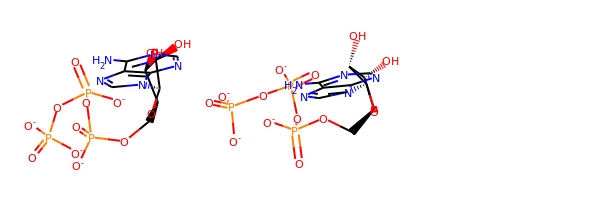

In [23]:
# Example molecules
mol_1 = df_crys_poses_rdk.loc['1fin', 'mol_rdk']
mol_2 = df_crys_poses_rdk.loc['1b38', 'mol_rdk']

Chem.Draw.MolsToGridImage([mol_1, mol_2])

In [85]:
def get_mol_coords(mol, centered = True):
    num_atoms = len(mol.GetAtoms())
    coords = pd.DataFrame({
       'x': [mol.GetConformer().GetAtomPosition(i).x for i in range(num_atoms)],
       'y': [mol.GetConformer().GetAtomPosition(i).y for i in range(num_atoms)],
       'z': [mol.GetConformer().GetAtomPosition(i).z for i in range(num_atoms)]},
            index = [mol.GetAtomWithIdx(i).GetSymbol() for i in range(num_atoms)])
    if centered:
        coords = coords - coords.mean(axis =  0)
    return coords

In [86]:
coords_1 = get_mol_coords(mol_1)
coords_2 = get_mol_coords(mol_2)

In [87]:
def calc_cov(centered_coord):
    n, m = centered_coord.shape
    cov = np.dot(centered_coord.T, centered_coord) / (n)
    return cov

In [95]:
cov_1 = calc_cov(coords_1)
cov_2 = calc_cov(coords_2)

array([[ 4.79456201,  0.98398779, -4.20694859],
       [ 0.98398779,  1.34325994, -1.39228244],
       [-4.20694859, -1.39228244, 12.57797997]])

In [89]:
def calc_eigen(cov):
    eigen_values, eigen_vectors = np.linalg.eig(cov)
    return eigen_values, eigen_vectors

In [96]:
L_1, V_1 = calc_eigen(cov_1)
L_1, V_2 = calc_eigen(cov_2)

In [24]:
# Cálculo de la matriz de correlación
atm_mol = df_crys_poses_rdk.loc['1fin', 'mol_rdk']
#atm_mol = Chem.RemoveHs(atm_mol)

num_atoms = len(atm_mol.GetAtoms())
# Obtenemos las coordenadas de los átomos
coords = pd.DataFrame({
   'x': [atm_mol.GetConformer().GetAtomPosition(i).x for i in range(num_atoms)],
   'y': [atm_mol.GetConformer().GetAtomPosition(i).y for i in range(num_atoms)],
   'z': [atm_mol.GetConformer().GetAtomPosition(i).z for i in range(num_atoms)]})
# Centralizamos los valores
centered_coord = coords - coords.mean(axis=0)
# Cálculo de la matriz de covarianza sin pesos
n, m = centered_coord.shape
C = np.dot(centered_coord.T, centered_coord) / (n)
C

print(C)

# un paso que se omite aquí es que el primer eje, aquí representado como x, 
# será aquel que tenga el átomo con mayor peso, esto ocurre con la molécula 1aq1

# Obtenemos los eigenvalores
l_1, l_2, l_3 = np.linalg.eig(C)[0]
eigenvectors = np.linalg.eig(C)[1]
L = np.array([l_1, l_2, l_3])
print(l_1, l_2, l_3)

# Cálculo de Tu
T = L.sum()
print(T)

# Cálculo de A (Suma de los productos de la combinatoria)
import itertools
comb = itertools.combinations(L, 2)
A = np.array([i[0]*i[1] for i in comb]).sum()
print(A)

# Cálculo de V
# V = T + A + (l1*l1*l2)
V = T + A + (L.prod())
print(V)

# Cálculo de K
K = 3/4 * sum(abs((L / L.sum()) - (1/3)))

# Cálculo de P
P = L / L.sum()
print(P)

# Cálculo de E
t = np.dot(centered_coord, eigenvectors) # Coordenadas proyectadas
E = (L**2 * n) / (t ** 4).sum(axis = 0)
print(E)

# Cálculo de D
E.prod()

# Cál

[[ 3.70653789  1.88840546 -4.86600543]
 [ 1.88840546  2.36186779 -4.03800605]
 [-4.86600543 -4.03800605 15.67115522]]
18.612656162751875 2.147132983078222 0.9797717490710709
21.739560894901167
60.303702871495275
121.19871297172224
[0.85616523 0.09876616 0.04506861]
[0.54289629 0.44634262 0.33873591]


0.08208172370355445

In [26]:
def get_mol_coords(mol, centered = True):
    num_atoms = len(mol.GetAtoms())
    coords = pd.DataFrame({
       'x': [mol.GetConformer().GetAtomPosition(i).x for i in range(num_atoms)],
       'y': [mol.GetConformer().GetAtomPosition(i).y for i in range(num_atoms)],
       'z': [mol.GetConformer().GetAtomPosition(i).z for i in range(num_atoms)]})
    if centered:
        coords = coords - coords.mean(axis =  0)
    return coords

def calc_cov(centered_coord):
    n, m = centered_coord.shape
    cov = np.dot(centered_coord.T, centered_coord) / (n)
    return cov

def calc_eigen(cov):
    eigen_values, eigen_vectors = np.linalg.eig(cov)
    return eigen_values, eigen_vectors

def project_coords(centered_coord, e_vectors):
    projected = np.dot(centered_coord, e_vectors)
    return projected


atm_mol_1b38 = df_crys_poses_rdk.loc['1b38', 'mol_rdk']
coords_1b38 = get_mol_coords(atm_mol_1b38)
cov_1b38 = calc_cov(coords_1b38)
L_1b38, V_1b38 = calc_eigen(cov_1b38)
t_1b38 = project_coords(coords_1b38, V_1b38)

atm_mol_1fin = df_crys_poses_rdk.loc['1fin', 'mol_rdk']
coords_1fin = get_mol_coords(atm_mol_1fin)
cov_1fin = calc_cov(coords_1fin)
L_1fin, V_1fin = calc_eigen(cov_1fin)
t_1fin = project_coords(coords_1fin, V_1fin)

print(L_1b38)
print(L_1fin)

[14.62728943  3.01695878  1.07155217]
[18.61265616  2.14713298  0.97977175]


In [27]:
df_whim.head(15)

,,L1u,L2u,L3u,P1u,P2u,G1u,G2u,G3u,E1u,E2u,...,Dp,Di,Ds,Vu,Vm,Vv,Ve,Vp,Vi,Vs
pdb_id,lig_name,,,,,,,,,,,,,,,,,,,,,
1aq1,STU,7.055,6.592,0.574,0.496,0.464,0.163,0.165,0.165,0.560,0.509,...,0.312,0.387,0.414,95.243,96.377,93.868,96.361,92.425,96.050,113.410
1b38,ATP,14.627,3.017,1.072,0.782,0.161,0.168,0.168,0.168,0.537,0.444,...,0.359,0.447,0.471,129.040,128.184,119.394,136.450,105.957,134.649,142.233
1b39,ATP,15.143,2.971,1.157,0.786,0.154,0.168,0.168,0.168,0.540,0.430,...,0.357,0.443,0.486,137.255,136.863,126.726,145.415,112.378,143.401,155.683
1ckp,PVB,9.851,1.338,0.323,0.856,0.116,0.193,0.193,0.193,0.581,0.507,...,0.590,0.502,0.698,32.549,40.035,33.804,33.414,35.072,32.473,37.695
1di8,DTQ,13.308,3.023,0.010,0.814,0.185,0.183,0.183,0.186,0.536,0.379,...,0.343,0.417,0.341,57.162,59.616,55.138,59.596,52.744,58.066,50.606
1dm2,HMD,7.229,3.692,0.240,0.648,0.331,0.172,0.172,0.181,0.463,0.356,...,0.348,0.339,0.420,46.874,57.542,39.440,48.055,43.026,48.748,51.961
1e1v,CMG,10.130,1.867,0.163,0.833,0.154,0.193,0.193,0.193,0.613,0.345,...,0.485,0.429,0.292,36.122,35.743,35.956,35.733,36.193,36.594,31.385
1e1x,NW1,9.884,2.290,0.072,0.807,0.187,0.193,0.193,0.193,0.591,0.365,...,0.422,0.397,0.308,37.393,38.159,35.999,38.136,34.788,38.533,36.141
1e9h,INR,11.527,3.131,0.130,0.780,0.212,0.179,0.179,0.250,0.543,0.504,...,0.314,0.400,0.342,57.471,63.172,53.078,62.100,48.944,60.140,56.101


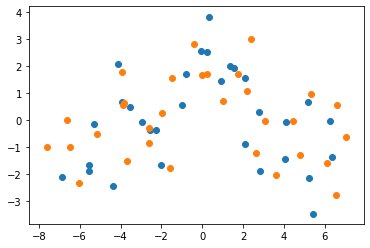

In [29]:
# plot de la molécula en los primeros dos componentes
import matplotlib.pyplot as plt
plt.scatter(x = t_1b38.T[0], y = t_1b38.T[1])
plt.scatter(x = -1 * t_1fin.T[0], y = -1 * t_1fin.T[1])
plt.show()

# PENDIENTE

31
[[ 4.95437998  1.01678768 -4.34717889]
 [ 1.01678768  1.38803751 -1.43869312]
 [-4.34717889 -1.43869312 12.9972429 ]]
15.114865742772357 3.117524072626551 1.1072705759989463


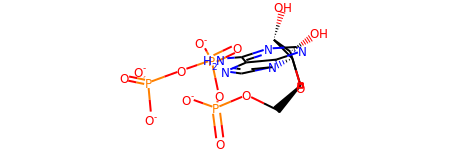

In [168]:
# Cálculo de la matriz de correlación
atm_mol = df_crys_poses_rdk.loc['1b38', 'mol_rdk']
#atm_mol = Chem.RemoveHs(atm_mol)

num_atoms = len(atm_mol.GetAtoms())
print(num_atoms)
# Obtenemos las coordenadas de los átomos
coords = pd.DataFrame({
   'x': [atm_mol.GetConformer().GetAtomPosition(i).x for i in range(num_atoms)],
   'y': [atm_mol.GetConformer().GetAtomPosition(i).y for i in range(num_atoms)],
   'z': [atm_mol.GetConformer().GetAtomPosition(i).z for i in range(num_atoms)]})

centered_coord = coords - coords.mean(axis=0)

n, m = centered_coord.shape
C = np.dot(centered_coord.T, centered_coord) / (n)
C

# Generamos la matriz de coordenadas sin pesos
#m_cov = np.cov(coords.T)
print(C)

# Obtenemos los eigenvalores
l_1, l_2, l3 = np.linalg.eig(m_cov)[0]
print(l_1, l_2, l3)

Chem.RemoveHs(atm_mol)

Visualizamos la matriz de correlación de los descriptores. Como puede observarse hay patrones de correlación entre los descriptores que se diferencian únicamente por los esquemas de peso usados.

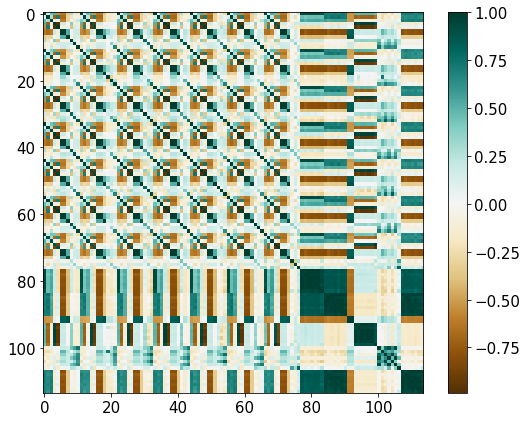

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 7))
plt.rcParams.update({'font.size': 15})
plt.imshow( df_whim.corr(), cmap='BrBG')
plt.colorbar();

***
### Selección de características
Importamos las librerías de **sklearn** que vamos a utilizar para hacer la selección de los descriptores finales.

In [49]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

In [50]:
#Estandarizamos
if False:
    scaler = StandardScaler()
    df_whim[df_whim.columns] = scaler.fit_transform(df_whim[df_whim.columns])

- **Eliminando características constantes o poco variables.**

In [51]:
#Eliminando características constantes
umbral_var = 0.001
constant_filter = VarianceThreshold(threshold = umbral_var)
constant_filter.fit( df_whim )
non_const_columns = df_whim.columns[constant_filter.get_support()]

print(F'Número de características a conservar: {len(non_const_columns)}\nSu varianza es mayor a {umbral_var}.')

Número de características a conservar: 98
Su varianza es mayor a 0.001.


In [52]:
df_whim_no_const = df_whim[non_const_columns]
df_whim_no_const.head(5)

,,L1u,L2u,L3u,P1u,P2u,G3u,E1u,E2u,E3u,L1m,...,Dp,Di,Ds,Vu,Vm,Vv,Ve,Vp,Vi,Vs
pdb_id,lig_name,,,,,,,,,,,,,,,,,,,,,
1aq1,STU,7.055,6.592,0.574,0.496,0.464,0.165,0.560,0.509,0.220,7.143,...,0.312,0.387,0.414,95.243,96.377,93.868,96.361,92.425,96.050,113.410
1b38,ATP,15.143,2.971,1.157,0.786,0.154,0.168,0.540,0.430,0.307,15.540,...,0.357,0.443,0.486,137.255,136.863,126.726,145.415,112.378,143.401,155.683
1b39,ATP,15.143,2.971,1.157,0.786,0.154,0.168,0.540,0.430,0.307,15.540,...,0.357,0.443,0.486,137.255,136.863,126.726,145.415,112.378,143.401,155.683
1ckp,PVB,9.851,1.338,0.323,0.856,0.116,0.193,0.581,0.507,0.451,10.938,...,0.590,0.502,0.698,32.549,40.035,33.804,33.414,35.072,32.473,37.695
1di8,DTQ,13.308,3.023,0.010,0.814,0.185,0.186,0.536,0.379,0.298,13.525,...,0.343,0.417,0.341,57.162,59.616,55.138,59.596,52.744,58.066,50.606


In [53]:
# Removiendo caracteristicas duplicadas
# Verificamos si hay columnas identicas
df_whim_no_const.T.duplicated().sum()

0

In [54]:
# Eliminando características correlacioneadas
correlated_features = set()
corr_mat_whim = df_whim_no_const.corr()

for row in range(len(corr_mat_whim)):
    for col in range(row):
        if abs(corr_mat_whim.iloc[row, col]) > 0.7:
            colname = corr_mat_whim.columns[row]
            correlated_features.add(colname)
len(correlated_features)

85

In [52]:
#correlated_features

In [55]:
# Eliminamos las características con mayor correlación
df_whim_final = df_whim_no_const.drop(labels=correlated_features, axis=1)

In [56]:
df_whim_final.columns

Index(['L1u', 'L2u', 'L3u', 'G3u', 'E1u', 'E2u', 'E3u', 'E1m', 'E2m', 'E3m',
       'E1s', 'E2s', 'E3s'],
      dtype='object')

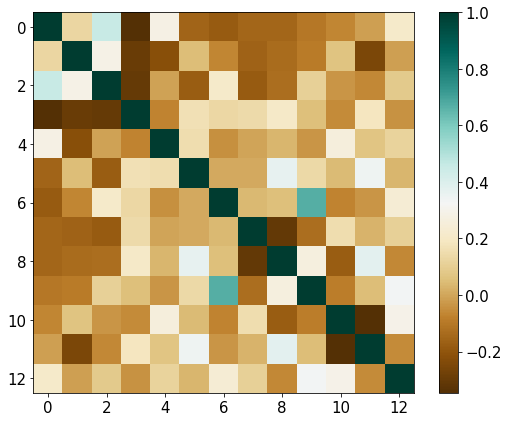

In [57]:
%matplotlib inline
# visualizamos la matriz D
fig = plt.figure(figsize=(9, 7))
plt.rcParams.update({'font.size': 15})
plt.imshow(df_whim_final.corr(), cmap='BrBG')
plt.colorbar();

#### Análisis de Componentes Principales

In [59]:
from sklearn.decomposition import PCA
#from modulos.plotting_functions import plot_mds_or_pca, plot_anotation_labels

pca_whim = PCA(copy=True, n_components= 2).fit_transform( df_whim_final )

In [63]:
ligand_labels = ["red" if i else "none" for i in df_crys_poses_rdk.Lig == "ATP"]

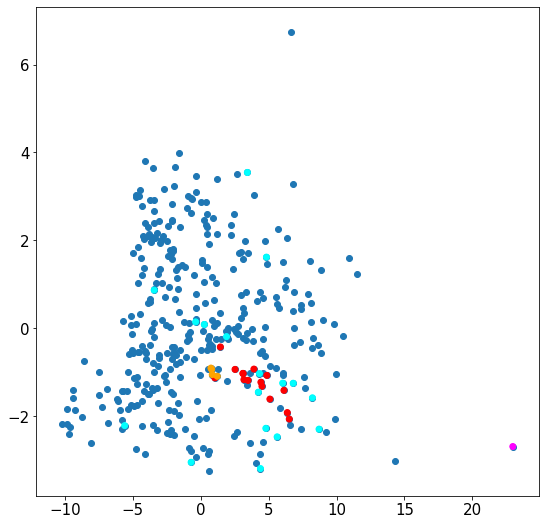

In [65]:
label_ATP = ["red" if i else "none" for i in df_crys_poses_rdk.Lig == "ATP"]
label_ADP = ["orange" if i else "none" for i in df_crys_poses_rdk.Lig == "ADP"]
label_STU = ["magenta" if i else "none" for i in df_crys_poses_rdk.index == "5a14"]

lista_csar = ["4ek4", "4ek5", "4fkg", "4fki", "4ek6", "4fjk", "4fkl", "4ek8", "3sw4", "3sw7", 
              "4fko", "4fkp", "4fkq", "4fkr", "4fks", "4fkt", "4fku", "4fkv", "4fkw"]
#lista_csar = ["4fku", "4fkw"]
label_csar = ["cyan" if i in lista_csar else "none" for i in df_crys_poses_rdk.index]

fig = plt.figure(figsize=(9, 9))
#plot_mds_or_pca(mds = pca_whim.T, alpha = 0.8, colors_list=ligand_labels, general_font_size= 20)
plt.scatter(pca_whim.T[0], pca_whim.T[1])
plt.scatter(pca_whim.T[0], pca_whim.T[1], color=label_ATP)
plt.scatter(pca_whim.T[0], pca_whim.T[1], color=label_csar)
plt.scatter(pca_whim.T[0], pca_whim.T[1], color=label_ADP)
plt.scatter(pca_whim.T[0], pca_whim.T[1], color=label_STU);


In [66]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components= 2, n_neighbors=10).fit_transform( df_whim_final )

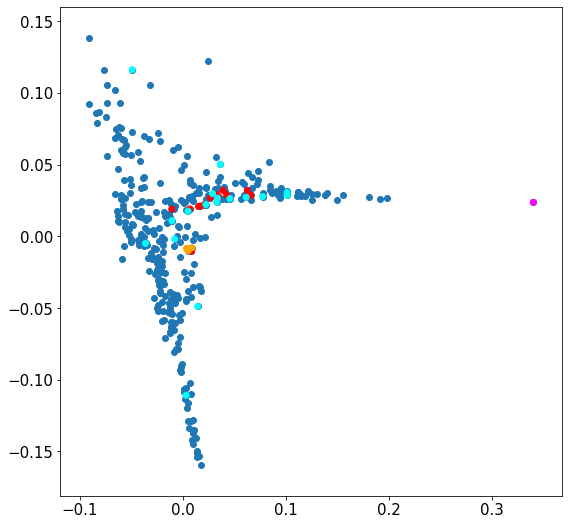

In [67]:
fig = plt.figure(figsize=(9, 9))
#plot_mds_or_pca(mds = pca_whim.T, alpha = 0.8, colors_list=ligand_labels, general_font_size= 20)
plt.scatter(lle[:,0], lle[:,1])
plt.scatter(lle[:,0], lle[:,1], color=label_ATP)
plt.scatter(lle[:,0], lle[:,1], color=label_ADP)
plt.scatter(lle[:,0], lle[:,1], color=label_csar)
plt.scatter(lle[:,0], lle[:,1], color=label_STU);


In [95]:
from scipy.spatial import distance_matrix
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
whim_final = scaler.fit_transform(df_whim_final)
D = distance_matrix(whim_final, whim_final)

In [96]:
from scipy.spatial.distance import euclidean
import scipy

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
whim_final = scaler.fit_transform(df_whim_final)

leng = whim_final.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = euclidean(whim_final[i], whim_final[j])

In [97]:
D.shape

(365, 365)

In [98]:
from modulos.MDS import cMDS
mds = cMDS(D)

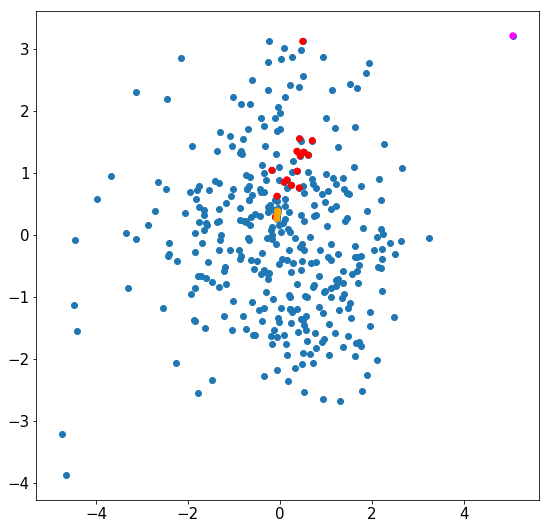

In [99]:
fig = plt.figure(figsize=(9, 9))
plt.scatter(mds[0][0], mds[0][1])
plt.scatter(mds[0][0], mds[0][1], color=label_ATP)
plt.scatter(mds[0][0], mds[0][1], color=label_ADP)
plt.scatter(mds[0][0], mds[0][1], color=label_STU)